# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

# Importing Train Dataset

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('C:/Users/HP/Desktop/Images/Train 2',
                                                 batch_size = 300,
                                                 target_size = (150,150),
                                                 class_mode = 'binary')

Found 279 images belonging to 2 classes.


# Data Manipulation

In [3]:
X, Y = next(iter(training_set))

In [4]:
L = []
for i in range(Y.size):
    L.append(X[i].flatten())

X = np.asarray(L)

# Splitting the Training dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# Hyperparameter Tuning using Gridsearch

In [6]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [20, 25, 100], 'random_state': [0,1,5,42,75], 'criterion': ['entropy'], 
              'max_depth': [5, 8, 15], 'min_samples_split' :[10, 15, 100], 'min_samples_leaf': [1, 2, 5]}]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train,Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 73.68 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 0}


# Creating a Random Forest Classifier object

In [7]:
classifier1 = RandomForestClassifier(n_estimators = 100, random_state = 0, criterion='entropy',
                                    max_depth = 8, min_samples_split = 10, min_samples_leaf = 1)
classifier1.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10,
                       random_state=0)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
X_Pred = classifier1.predict(X_test)
cm = confusion_matrix(Y_test,X_Pred)
print(cm)
accuracy_score(Y_test,X_Pred)

[[18  8]
 [11 19]]


0.6607142857142857

In [9]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = Y_train , cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.68 %
Standard Deviation: 10.11 %


# Testing the data using the Classifier Object

In [10]:
Test_datagen = ImageDataGenerator(rescale = 1./255)
Test_set = Test_datagen.flow_from_directory('C:/Users/HP/Desktop/Images/Test',
                                                 batch_size = 35,
                                                 target_size = (150,150),
                                                 class_mode = 'binary')

test_inputs,test_targets = next(iter(Test_set))

L = []
for i in range(test_targets.size):
    L.append(test_inputs[i].flatten())

test_inputs = np.asarray(L)

Found 35 images belonging to 2 classes.


In [11]:
Test_set.class_indices

{'No Pipes': 0, 'PVC Pipes': 1}

Accuracy based on Test data is 45.71%
[[ 4 11]
 [ 8 12]]


Text(33.0, 0.5, 'Predicted class')

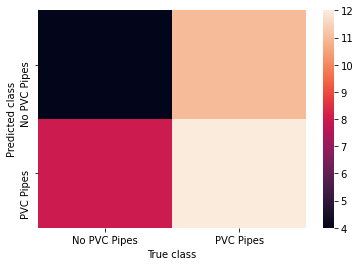

In [12]:
test_pred = classifier1.predict(test_inputs)

accuracy = accuracy_score(test_targets,test_pred)

print(f'Accuracy based on Test data is {accuracy*100:.2f}%')

cm = confusion_matrix(test_targets,test_pred)

print(cm)

sns.heatmap(cm,xticklabels=['No PVC Pipes','PVC Pipes'],yticklabels=['No PVC Pipes','PVC Pipes'])
plt.xlabel('True class')
plt.ylabel('Predicted class')